In [122]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [123]:
# Download the data
data = et.data.get_data('colorado-flood')

In [124]:
# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

# Define relative path to file with daily discharge data
stream_discharge_path = os.path.join("colorado-flood",
                                     "discharge",
                                     "06730200-discharge-daily-1986-2013.csv")

# Challenge 1: Explore Your Data & Metadata
Before you begin working with files using python, it can be helpful to look at the structure of the file itself. In some cases, text files have metadata at the top of the file that tell you more about the data within the file itself. This information at the top of the text file can help you make decisions about how you plan to import the data, and what cleanup steps you may need to take.

Open the files earth-analytics/data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.csv and earth-analytics/data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt by clicking on them and review their contents. Use these files to answer the questions below:

1. What is the delimiter used in 06730200-discharge-daily-1986-2013.csv?
`comma`
2. What are the units for stream discharge in the data?
    `cubic feet per second`
3. Where was this data collected?
    `BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO`
4. What is the frequency of the data collection (day, week, month)?
   `day`
5. What does each number represent in the data (a single observation, minimum value, max value or mean value)?
    `mean`

Write down your answers in the cell below as a comment.

HINT: You may also want to explore the README_dischargeMetadata.rtf file located in the same directory. This file contains metadata that describes in more detail the data that you are using

# Challenge 2: Open and Plot a CSV File with Time Series Data
The code above creates a path (stream_discharge_path) to open daily stream discharge measurements taken by U.S. Geological Survey from 1986 to 2013 at Boulder Creek in Boulder, Colorado. Using pandas, do the following with the data:

1. Read the data into Python as a pandas DataFrame.
2. Parse the dates in the datetime column of the pandas DataFrame.
3. Set the datetime as the index for your DataFrame.
3. Plot the newly opened data with matplotlib. Make sure your x-axis is the dates, and your y-axis is the disValue column from the pandas DataFrame.
4. Give your plot a title and label the axes.

If you need a refresher on how to plot time series data, check out this lesson on working with time series data in Pandas.

In [125]:
# Import data using datetime and no data value
discharge_1986_2013_daily = pd.read_csv(stream_discharge_path,
                                     parse_dates=['datetime'],
                                     index_col= ['datetime'],
)
discharge_1986_2013_daily.describe()

,site_no,disValue
count,9954.0,9954.000000
mean,6730200.0,93.712645
std,0.0,143.942426
min,6730200.0,0.870000
25%,6730200.0,32.000000
50%,6730200.0,54.000000
75%,6730200.0,108.000000
max,6730200.0,4770.000000


In [126]:
discharge_1986_2013_daily.head()

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A


/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_67309/999124025.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


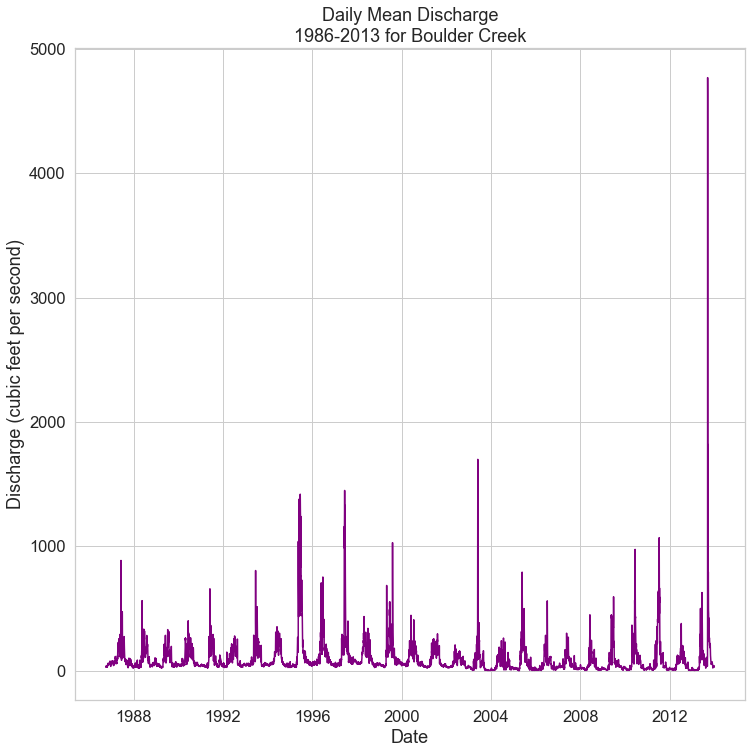

In [127]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(discharge_1986_2013_daily.index.values,
       discharge_1986_2013_daily['disValue'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Daily Mean Discharge\n1986-2013 for Boulder Creek")

plt.show()

In [128]:
discharge_1986_2013_daily[
    discharge_1986_2013_daily.disValue == discharge_1986_2013_daily.disValue.max()
].index[0]

Timestamp('2013-09-12 00:00:00')

Once you have created your plot, answer the following questions.

1. What is the max value for stream charge in the data? One what date did that value occur?
`4770`, `2013-09-12`
2. Consider the entire dataset. Do you see any patterns of stream discharge values in the data?
`annual peaks`

# Challenge 3: Subset the Data
The 2013 Colorado Flood occurred in 2013 (as the name implies). The plot above shows all of the stream discharge data over several decades. In this challenge you will subset the data to just the year and months during which the flood event occurred.

Do the following:

1. Subset the data to include only discharge data from August 1st, 2013 through October 31, 2013
1. Plot the newly subset data with matplotlib. Make sure your x-axis contains dates, and your y-axis is contains the disValue column from your pandas DataFrame.
1. Give your plot a title and label the axes.
1. Format the dates on the x-axis so they only show the month and the day. Additionally, you can angle the dates using the line of code fig.autofmt_xdate().
1. Make the x-axis week ticks only show up for every other week.

/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_67309/24705547.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


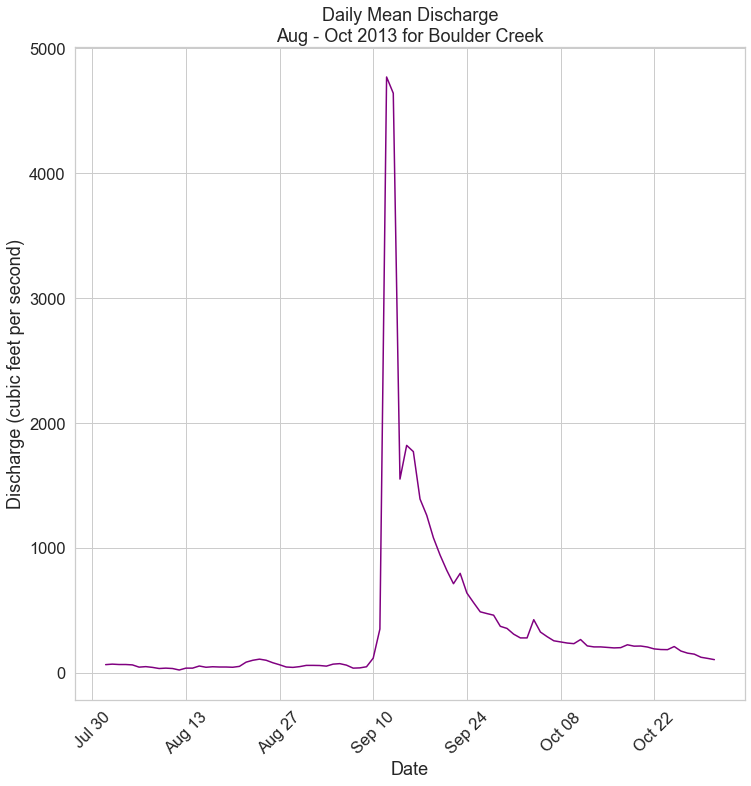

In [129]:
discharge_daily_augoct2013 = discharge_1986_2013_daily['2013-08-01':'2013-10-31']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(discharge_daily_augoct2013.index.values,
       discharge_daily_augoct2013['disValue'],
       color='purple')

date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Daily Mean Discharge\nAug - Oct 2013 for Boulder Creek")

plt.show()

# Challenge 4: Resample the Data
Next, summarize the stream discharge data by week. Additionally, you will clean up the format of the date labels on the x-axis. Do the following:

1. Resample the DataFrame that you made above for August - October, 2013 to represent the maximum stream discharge value for each week.
1. Plot the newly resampled data as a scatterplot (ax.scatter())using matplotlib. Give your plot a title and label the x and y axes.
1. Format the dates on the x-axis so they only show the month and the day. Additionally, you can angle the dates using the line of code fig.autofmt_xdate().
1. Adjust the x-axis ticks and labels so you have one label and tick for every other week.

/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_67309/1731243738.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


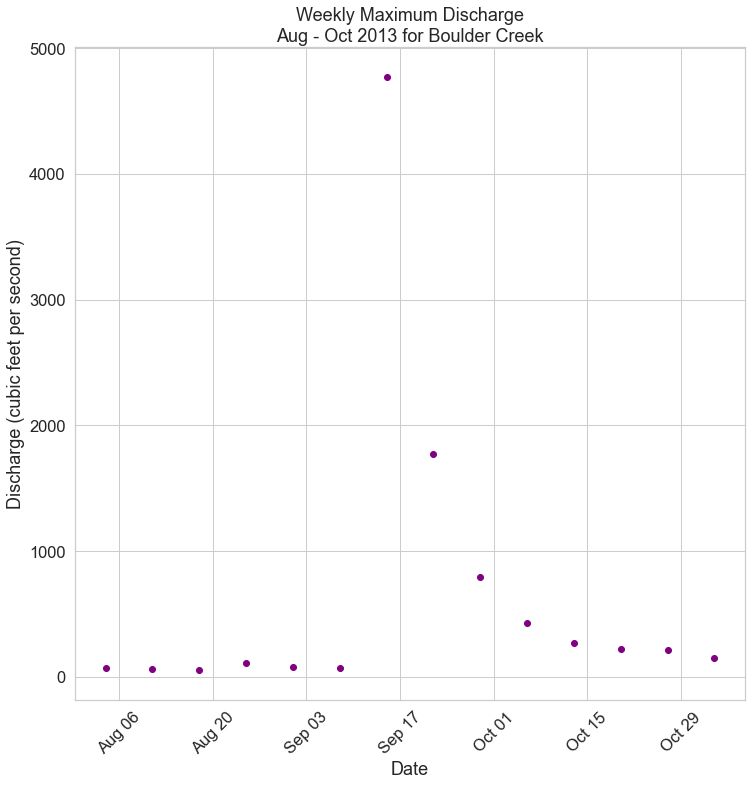

In [130]:
discharge_weekly_max_augoct2013 = discharge_daily_augoct2013.resample('W').max()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.scatter(discharge_weekly_max_augoct2013.index.values,
       discharge_weekly_max_augoct2013['disValue'],
       color='purple')

date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Weekly Maximum Discharge\nAug - Oct 2013 for Boulder Creek")

plt.show()

# Challenge 5: Compare Two Months Side by Side
In this next challenge, you will compare daily max stream discharge for two time periods. Create a plot comparing stream discharge in levels to the levels seen 10 years ago during the same months. Do the following:

1. Create a data subset for the time periods:
    - August 1st, 2003 - October 31st, 2003
    - August 1st, 2013 - October 31st, 2013
1. Plot the data from 2003 on a plot above of the data from 2013 using `matplotlib`.
1. Add titles to each plot and and label the x and y axes.
1. Use `fig.suptitle("title-here")` to add a title to your figure.
1. Modify the y limits of both plots to range from 0 to the max value found in the 2013 data subset.
    - Hint: you can use `round(data-frame-name["disValue"].max(), -3)` to get the max value from your 2013 data.
    - use `ax.set_ylim(min-value, max-value)` to set the limits
1. Format the dates on the x-axis as follows:
    - Make sure date ticks only show the month and the day - example: `Aug-06`.
    - Make the x-axis week ticks only display for every other week.
1. Use `plt.tight_layout()` to ensure your plots don’t overlap each other.

OPTIONAL: You may have noticed empty space on either side of the x-axis in your previous plot. Use `ax.set_xlim()` to set the x limits of your plot to the minimum and maximum date values in each of your subset datasets.

In [131]:
discharge_daily_augoct2003 = discharge_1986_2013_daily['2003-08-01':'2003-10-31']
discharge_daily_augoct2013 = discharge_1986_2013_daily['2013-08-01':'2013-10-31']

/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_67309/3696374496.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


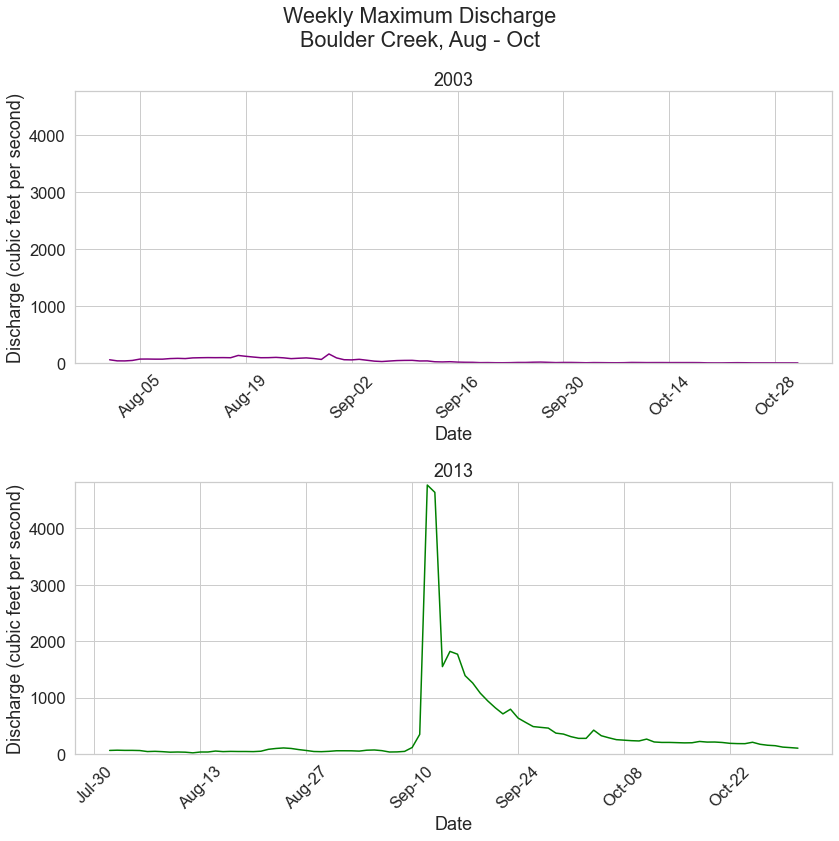

In [132]:
# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle("Weekly Maximum Discharge\nBoulder Creek, Aug - Oct")

# Add x-axis and y-axis
ax[0].plot(discharge_daily_augoct2003.index.values,
       discharge_daily_augoct2003['disValue'],
       color='purple')

# Set title and labels for axes
ax[0].set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="2003",
       # xlim=["2012-08-01", "2012-11-01"],
       ylim=[0, discharge_daily_augoct2013['disValue'].max()],
)

# Define the date format
date_form = DateFormatter("%b-%d")
ax[0].xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

# Rotate tick marks on x-axis
plt.setp(ax[0].get_xticklabels(), rotation=45)

# Add x-axis and y-axis
ax[1].plot(discharge_daily_augoct2013.index.values,
       discharge_daily_augoct2013['disValue'],
       color='green')

# Set title and labels for axes
ax[1].set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="2013",
       # xlim=["2013-08-01", "2013-11-01"],
       ylim=[0, 1.01*(discharge_daily_augoct2013['disValue'].max())],
)

# Define the date format
date_form = DateFormatter("%b-%d")
ax[1].xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

# Rotate tick marks on x-axis
plt.setp(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Bonus Challenge 1: Get Data from Hydrofunctions
There are many ways to get data into **python**. So far you have used `et.data.get_data()` to download your data. However you can also access data directly using open source tools that access API’s (automated tools that directly access and downoad data from the data servers).

**hydrofunctions** is an open source **Python** package that allows you to download hydrologic data from the U.S. Geological Survey. For the bonus challenge, you’ll use **hydrofunctions** to download stream discharge data and plot it much like you did above. To get the data using **hydrofunctions**, run the code below.

In [133]:
import hydrofunctions as hf

# Define the site number and start and end dates that you are interested in
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# Request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end)

# Convert the response to a json in order to use the extract_nwis_df function
longmont_resp = longmont_resp.json()

longmont_discharge, meta = hf.extract_nwis_df(longmont_resp)

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730500&startDT=1946-05-10&endDT=2018-08-29


Once you have imported the data into a pandas DataFrame using the code above, perform the following tasks:

1. Rename the columns (USGS:06730500:00060:00003, USGS:06730500:00060:00003_qualifiers)) `discharge` and `flags`. This will make the data a bit easier to work with.
1. Subset the data to the time period: `1970` through the present.
1. Resample the data to calculate the annual maximum stream `discharge` value for each year.
1. Plot the data using `matplotlib`. Format the x and y axis so the labels are easy to read. Add a title to your plot.

HINT: if you don’t know how to rename a dataframe column, try looking it up using a Google search!

In [134]:
longmont_discharge = longmont_discharge.rename(
    columns = {
        longmont_discharge.columns[0]:"discharge", 
        longmont_discharge.columns[1]:"flags",
    }
)

longmont_discharge.head()

,discharge,flags
datetimeUTC,,
1946-05-10 00:00:00+00:00,16.0,A
1946-05-11 00:00:00+00:00,19.0,A
1946-05-12 00:00:00+00:00,9.0,A
1946-05-13 00:00:00+00:00,3.0,A
1946-05-14 00:00:00+00:00,7.8,A


In [135]:
from datetime import datetime
current_year = str(datetime.now().year)

longmont_discharge_1970_now = longmont_discharge['1970':current_year]

longmont_discharge_1970_now.head()

,discharge,flags
datetimeUTC,,
1970-01-01 00:00:00+00:00,4.723038,hf.missing
1970-01-02 00:00:00+00:00,4.723849,hf.missing
1970-01-03 00:00:00+00:00,4.724660,hf.missing
1970-01-04 00:00:00+00:00,4.725471,hf.missing
1970-01-05 00:00:00+00:00,4.726282,hf.missing


In [136]:
longmont_discharge_annual_max = longmont_discharge_1970_now.resample('Y').max()
longmont_discharge_annual_max.head()

,discharge,flags
datetimeUTC,,
1970-12-31 00:00:00+00:00,5.018197,hf.missing
1971-12-31 00:00:00+00:00,5.314166,hf.missing
1972-12-31 00:00:00+00:00,5.610947,hf.missing
1973-12-31 00:00:00+00:00,5.906916,hf.missing
1974-12-31 00:00:00+00:00,6.202886,hf.missing


/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_67309/1511014994.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


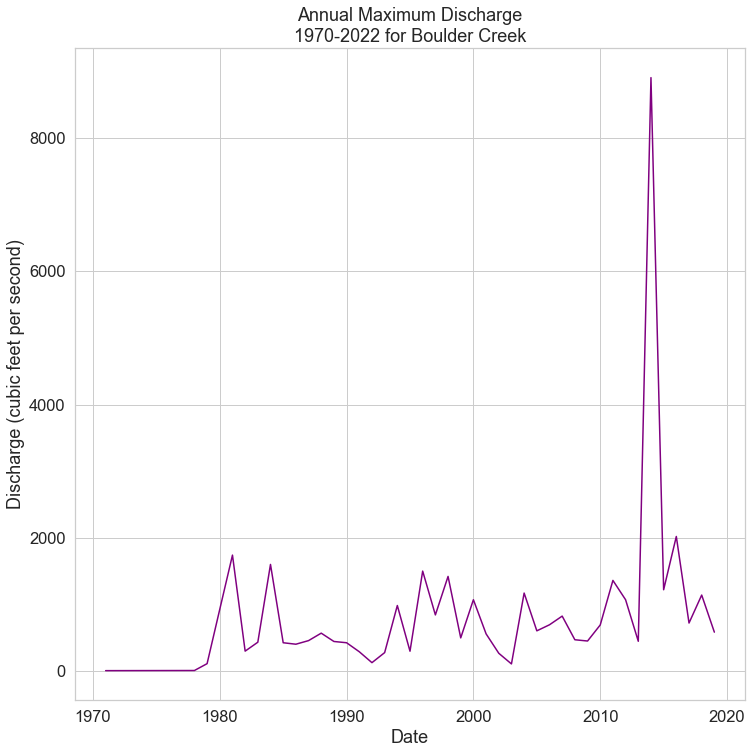

In [137]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(longmont_discharge_annual_max.index.values,
       longmont_discharge_annual_max['discharge'],
       color='purple')

# Set title and labels for axes
ax.set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Annual Maximum Discharge\n1970-"+current_year+" for Boulder Creek",
       )

plt.show()

# Bonus Challenge 2: Plot Precipitation and Stream Discharge In One Figure

For this challenge, you will open up the precipitation dataset also found in the colorado-flood download, and plot it side by side with discharge to see how they interact. For this challenge, you need to:

##### Precipitation Data Processing
1. Open the precipitation data that you used previously (`colorado-flood/precipitation/805325-precip-daily-2003-2013.csv`) using Pandas.
1. Make sure the date column (“DATE”) is set as the index.
1. Set the `na_values` to `999.99`.
1. Subset the precipitation data to the time period 2013.
1. Resample the precipitation data to provide a weekly `sum()` of all values instead of hourly.

In [138]:
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with hourly precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import data using datetime and no data value
precip_2003_2013_hourly = pd.read_csv(file_path,
                                      parse_dates=['DATE'],
                                      index_col=['DATE'],
                                      na_values=['999.99'])

precip_2013_hourly = precip_2003_2013_hourly.loc['2013']
precip_2013_weeklysum = precip_2013_hourly.resample('W').sum()

# View first few rows
precip_2013_weeklysum.head()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2013-01-06,1650.5,40.0338,-105.2811,0.0
2013-01-13,0.0,0.0000,0.0000,0.0
2013-01-20,0.0,0.0000,0.0000,0.0
2013-01-27,0.0,0.0000,0.0000,0.0
2013-02-03,4951.5,120.1014,-315.8433,0.2


##### Stream Discharge Data Processing
1. Subset the stream discharge data to the time period 2013.
1. Resample the discharge data provide a the weekly maximum values instead of daily.

In [141]:
discharge_2013_hourly = discharge_1986_2013_daily.loc['2013']
discharge_2013_weeklysum = discharge_2013_hourly.resample('W').max()


##### Plot Your Data In One Figure
- Plot the precipitation data and the discharge data as scatter plots stacked one on top of each other so you can compare the two visually.
- Format your plots with titles, x and y axis labels. Make sure the dates are easy to read.

/var/folders/nb/qps0bcwd16qcyqb4ghpw5sk40000gn/T/ipykernel_67309/3518597950.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


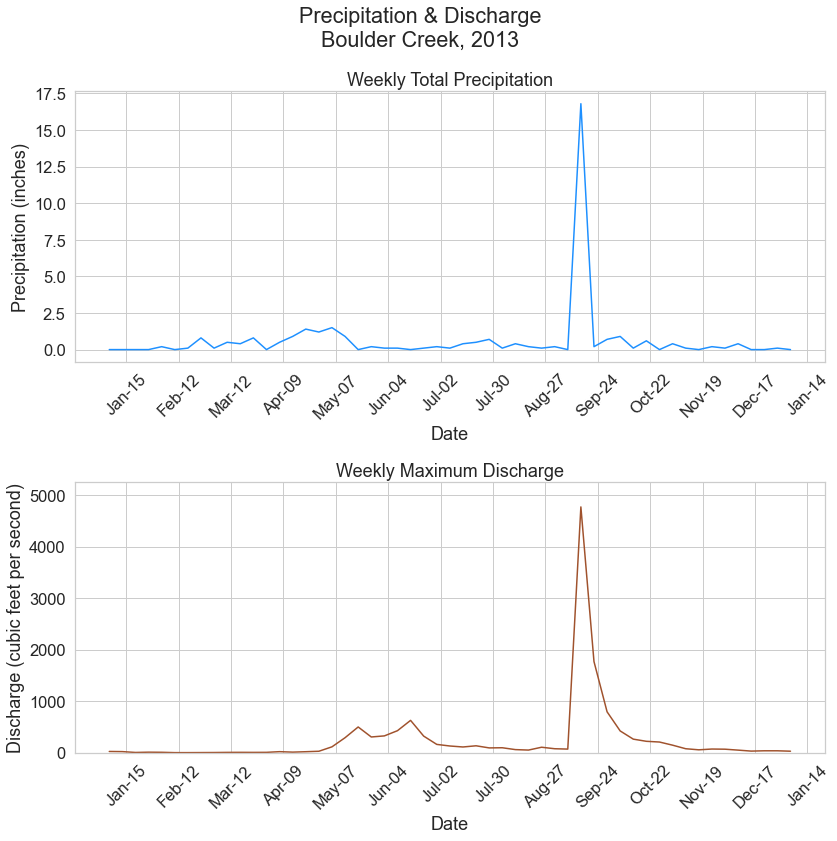

In [151]:
# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle("Precipitation & Discharge\nBoulder Creek, 2013")

# Add x-axis and y-axis
ax[0].plot(precip_2013_weeklysum.index.values,
       precip_2013_weeklysum['HPCP'],
       color='dodgerblue')

# Set title and labels for axes
ax[0].set(
       xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Weekly Total Precipitation",
       # xlim=["2012-08-01", "2012-11-01"],
       # ylim=[0, precip_2013_weeklysum['disValue'].max()],
)

# Define the date format
date_form = DateFormatter("%b-%d")
ax[0].xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))

# Rotate tick marks on x-axis
plt.setp(ax[0].get_xticklabels(), rotation=45)

# Add x-axis and y-axis
ax[1].plot(discharge_2013_weeklysum.index.values,
       discharge_2013_weeklysum['disValue'],
       color='sienna')

# Set title and labels for axes
ax[1].set(
       xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Weekly Maximum Discharge",
       # xlim=["2013-08-01", "2013-11-01"],
       ylim=[0, 1.1*(discharge_2013_weeklysum['disValue'].max())],
)

# Define the date format
date_form = DateFormatter("%b-%d")
ax[1].xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))

# Rotate tick marks on x-axis
plt.setp(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()